In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Get some data

In [2]:
df = pd.read_csv("./data/CaliforniaHousing/cal_housing.data", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [4]:
headers = ['longitude',
            'latitude',
            'housingMedianAge',
            'totalRooms',
            'totalBedrooms',
            'population',
            'households',
            'medianIncome',
            'medianHouseValue']

In [5]:
df.columns = headers

In [6]:
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [7]:
df.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### 2. Create train and test sets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = df['medianHouseValue']
X = df.iloc[:,:-1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)

In [12]:
X_train.shape

(16512, 8)

In [13]:
X_test.shape

(4128, 8)

#### 3. Choosing the (baseline) model 

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
lr.intercept_

-3565599.9958589138

In [18]:
lr.coef_

array([-4.24738451e+04, -4.22192961e+04,  1.16779804e+03, -8.10283487e+00,
        1.12525360e+02, -3.82590578e+01,  4.90092563e+01,  4.01585413e+04])

In [19]:
sum(X_train.iloc[0,:]*lr.coef_)+lr.intercept_

229065.5265845852

In [20]:
y_train[0]

452600.0

In [21]:
y_preds = lr.predict(X_train)

In [22]:
y_preds[0]

229065.5265845852

In [23]:
training_score = lr.score(X_train, y_train)
training_score

0.6379210375824909

In [24]:
test_score = lr.score(X_test, y_test)
test_score

0.6337776686606853

#### Note: Scaling
- Usually necessary for methods that estimate coefficients (linear regression, SVM, neural networks).
- Algorithms like decision trees (random forest, XGBoost) may not need it.
- **Gotcha:** Careful to not amplify noise by accident (spectrometry, time series). Normalization might make things worse.

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

- Standard scaler: $x \to \frac{x-mean(x)}{std(x)}$
- Min max scaler: $x \to \frac{x-min(x)}{max(x)-min(x)}$

In [26]:
scl = StandardScaler()

In [27]:
X_train_scl = scl.fit_transform(X_train)

In [28]:
X_train.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
17595,-121.89,37.31,40.0,1844.0,340.0,719.0,305.0,3.3682
6073,-117.85,34.07,32.0,761.0,101.0,295.0,95.0,11.1077
6251,-117.97,34.04,32.0,1507.0,295.0,1326.0,324.0,4.1190
3161,-118.85,35.23,26.0,1639.0,352.0,1222.0,395.0,1.7656
1887,-119.98,38.92,27.0,2682.0,606.0,1010.0,399.0,3.1500


In [29]:
X_train_scl[:5,:]

array([[-1.16323975,  0.78779092,  0.90718721, -0.36476738, -0.47220801,
        -0.62506657, -0.51037474, -0.26603632],
       [ 0.85676443, -0.72922058,  0.26954227, -0.87116633, -1.04878141,
        -1.00227238, -1.06724406,  3.79086582],
       [ 0.79676431, -0.74326698,  0.26954227, -0.52234489, -0.58076785,
        -0.08505731, -0.45999132,  0.12751909],
       [ 0.3567634 , -0.186093  , -0.20869143, -0.46062313, -0.44325872,
        -0.17757949, -0.27171646, -1.10608947],
       [-0.20823777,  1.54161454, -0.12898582,  0.02707225,  0.1695013 ,
        -0.36618239, -0.26110942, -0.38041271]])

**Important:** Transformations (scaling, feature extraction, etc) should be `fit_transform` on the *training* set and `transform` on the *test* set. That means, we apply the transformation created with the train set, never on the whole the data.

In [30]:
X_test_scl = scl.transform(X_test)

In [31]:
X_test_scl[:5,:]

array([[-1.43824032e+00,  1.01253337e+00,  1.86365462e+00,
        -4.19942887e-01, -3.66060604e-01, -7.18478383e-01,
        -3.75135044e-01, -1.01967535e-01],
       [ 6.81764069e-01, -6.96445636e-01,  1.86365462e+00,
         5.49836816e-01,  2.65998944e-01,  3.73995049e-01,
         3.24929248e-01,  8.78880749e-01],
       [-1.43824032e+00,  1.00785123e+00,  1.22600968e+00,
        -5.04576506e-01, -4.86682655e-01, -7.65629110e-01,
        -4.54687804e-01, -3.81174371e-04],
       [ 1.19676514e+00, -1.32385163e+00, -6.86925138e-01,
         9.48726641e-02,  4.40543698e-02,  3.56202322e-01,
         1.02181519e-01, -2.12360143e-01],
       [ 9.46764618e-01, -7.01127770e-01, -1.48398131e+00,
         1.03756856e-01, -4.19134307e-01, -1.78469122e-01,
        -3.77786802e-01,  2.01687863e+00]])

#### Pipelines

In [32]:
from sklearn.pipeline import make_pipeline

In [33]:
pipe = make_pipeline(MinMaxScaler(), LinearRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

In [34]:
pipe.score(X_train, y_train)

0.6379210375824909

In [35]:
pipe.predict(X_train)

array([229065.52658457, 483538.06368199, 196808.74236844, ...,
       242143.0112395 , 371263.49177575, 210065.78413585])

In [36]:
y_preds

array([229065.52658459, 483538.063682  , 196808.74236844, ...,
       242143.0112395 , 371263.49177576, 210065.78413584])

pipes = [pipe_lr, pipe_svm, pipe_custom]

for pipe in pipes:
    pipe.score()

#### 4. Model validation and decide next steps

In [37]:
training_score

0.6379210375824909

In [38]:
test_score

0.6337776686606853

**Parity plot**: Predicted values vs Observed values (usually in test set).

In [39]:
observed = y_test.values
predicted = pipe.predict(X_test)

In [40]:
observed

array([500000., 293900., 412500., ..., 123200., 182600.,  68000.])

In [41]:
predicted

array([271168.00268447, 298956.67821155, 266428.33411919, ...,
        83057.99650108, 256279.50451088, 137118.06914605])

In [42]:
minval = min(min(observed), min(predicted))
maxval = max(max(observed), max(predicted))

In [43]:
import numpy as np
ref = np.linspace(minval, maxval, 100)

Text(0, 0.5, 'Predicted')

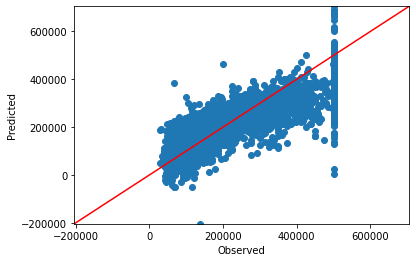

In [44]:
plt.scatter(observed, predicted)
plt.plot(ref, ref, 'r')
plt.xlim(minval, maxval)
plt.ylim(minval, maxval)
plt.xlabel("Observed")
plt.ylabel("Predicted")

#### Learning curve

In [45]:
from sklearn.model_selection import learning_curve

In [46]:
train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train
                                                        , cv=5
                                                        , train_sizes=np.linspace(0.1, 1.0, 10))

In [47]:
train_scores # Error on each cross-validation fold ()

array([[0.66715651, 0.62465628, 0.62465628, 0.62465628, 0.62465628],
       [0.6504285 , 0.64381482, 0.64381482, 0.64381482, 0.64381482],
       [0.6437297 , 0.64229279, 0.65167106, 0.65167106, 0.65167106],
       [0.63401277, 0.63373505, 0.64893554, 0.64893554, 0.64893554],
       [0.63537014, 0.63527825, 0.64681476, 0.64681476, 0.64681476],
       [0.63150836, 0.63138663, 0.64101532, 0.64248871, 0.64248871],
       [0.63092285, 0.63085275, 0.63906086, 0.63870455, 0.63870455],
       [0.63087085, 0.63082563, 0.63836839, 0.63607953, 0.63786309],
       [0.63457912, 0.63451553, 0.64102574, 0.63913927, 0.63460831],
       [0.63611293, 0.63608762, 0.64197705, 0.64019573, 0.63597253]])

In [48]:
train_sizes

array([ 1320,  2641,  3962,  5283,  6604,  7925,  9246, 10567, 11888,
       13209])

In [49]:
train_scores_cv = np.mean(train_scores, axis=1)
test_scores_cv = np.mean(test_scores, axis=1)

Text(0, 0.5, 'R2 score')

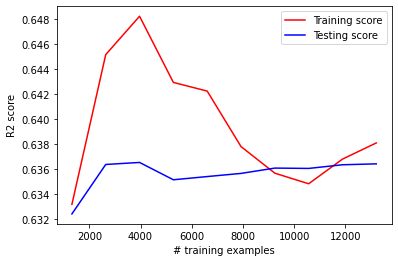

In [50]:
plt.plot(train_sizes, train_scores_cv, label='Training score', color='r')
plt.plot(train_sizes, test_scores_cv, label='Testing score', color='b')
plt.legend(loc='best')
plt.xlabel("# training examples")
plt.ylabel("R2 score")